In [1]:
import torch 
from torch import nn 
from PIL import Image as im 
from matplotlib import pyplot as plt 
%matplotlib inline
import numpy as np
from pytorchsummary import summary

In [2]:
class CNNET(nn.Module):
    def __init__(self):
        super(CNNET,self).__init__()

        self.layer = nn.Sequential(
            nn.Conv2d(1,16,5), # 28-5+1
            nn.ReLU(), #24
            nn.MaxPool2d(2,2), # 12

            nn.Conv2d(16,32,3), # 12+1-3
            nn.ReLU(), # 10
            nn.MaxPool2d(2,2), # 5
            

            nn.Conv2d(32,64,5), # 11-3+1
            nn.ReLU(),

            nn.Conv2d(64,10,1)   
        )
    
    def forward(self,x):
        x = self.layer(x)
        return x

In [3]:
model = CNNET()
summary((1,28,28),model)

               Layer	Output Shape        	    Kernal Shape    	#params             	#(weights + bias)   	requires_grad
------------------------------------------------------------------------------------------------------------------------------------------------------
            Conv2d-1	[1, 16, 24, 24]     	   [16, 1, 5, 5]    	416                 	(400 + 16)          	True True 
              ReLU-2	[1, 16, 24, 24]     	                    	                    	                    	          
         MaxPool2d-3	[1, 16, 12, 12]     	                    	                    	                    	          
            Conv2d-4	[1, 32, 10, 10]     	   [32, 16, 3, 3]   	4640                	(4608 + 32)         	True True 
              ReLU-5	[1, 32, 10, 10]     	                    	                    	                    	          
         MaxPool2d-6	[1, 32, 5, 5]       	                    	                    	                    	          
            Conv2d-7	[1, 64, 1, 1]

(56970, 56970, 0)

In [4]:
viz = {
    'outputimage':[],
    'kernels':[]
}
h=[]
def getActivation(module):
    def hook(module,input,output):
        if bool(module._parameters.keys()):
            viz['kernels'].append(module._parameters['weight'])
        viz['outputimage'].append(output)

    h.append(module.register_forward_hook(hook))
    

In [5]:
image = im.open('0.png')
image

In [6]:
from torchvision import transforms
transform = transforms.Compose([transforms.PILToTensor()])
image_tensor = transform(image)
image_tensor.shape

torch.Size([1, 28, 28])

In [7]:
img = image_tensor.unsqueeze(0)
img.shape


torch.Size([1, 1, 28, 28])

In [8]:
model.apply(getActivation)
x = model(img.float())

for i in h:i.remove()

In [9]:
for x,i in enumerate(viz['outputimage']):
    print(x,i.shape)

0 torch.Size([1, 16, 24, 24])
1 torch.Size([1, 16, 24, 24])
2 torch.Size([1, 16, 12, 12])
3 torch.Size([1, 32, 10, 10])
4 torch.Size([1, 32, 10, 10])
5 torch.Size([1, 32, 5, 5])
6 torch.Size([1, 64, 1, 1])
7 torch.Size([1, 64, 1, 1])
8 torch.Size([1, 10, 1, 1])
9 torch.Size([1, 10, 1, 1])
10 torch.Size([1, 10, 1, 1])


## After 1st convolution layer

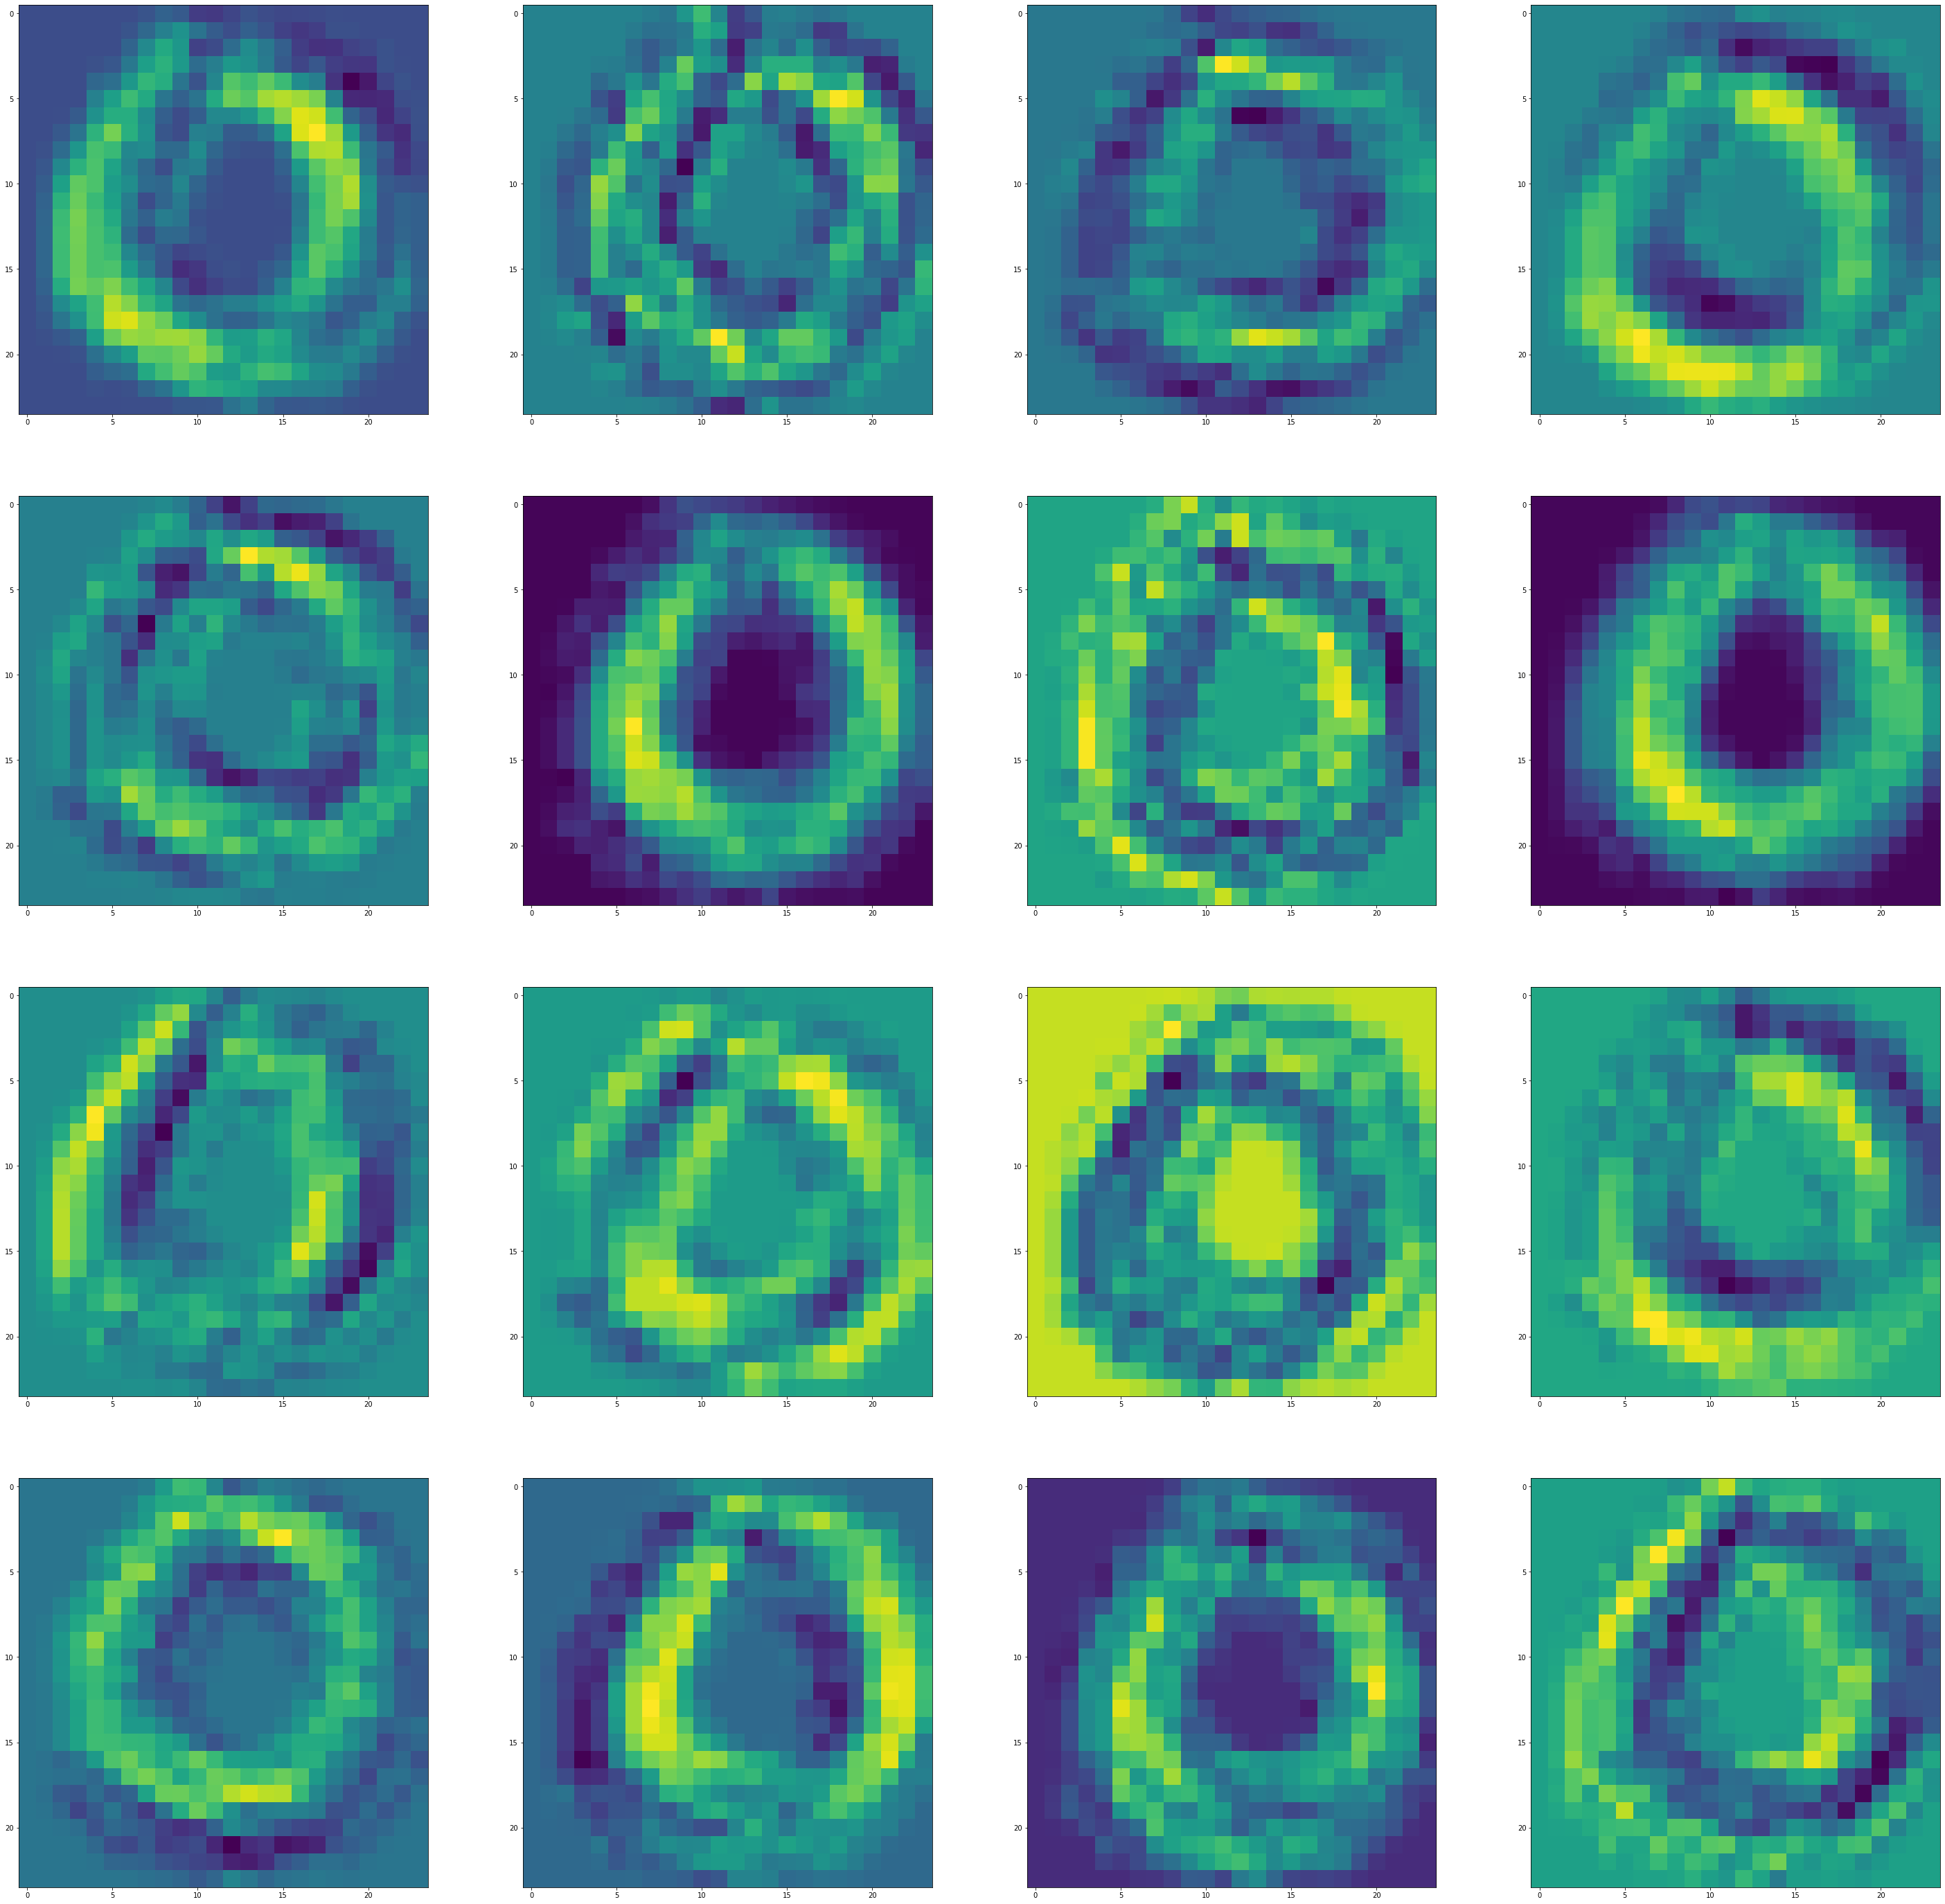

In [10]:
fig = plt.figure(figsize=(50,50))
# for i in range(16)
for image in viz['outputimage'][:-2]:
    image=image.squeeze()
    for i,img in enumerate(image):
        sub = fig.add_subplot(4,4,i+1)
        
        sub.imshow(img.detach().numpy())

    break

## After 1st ReLU layer

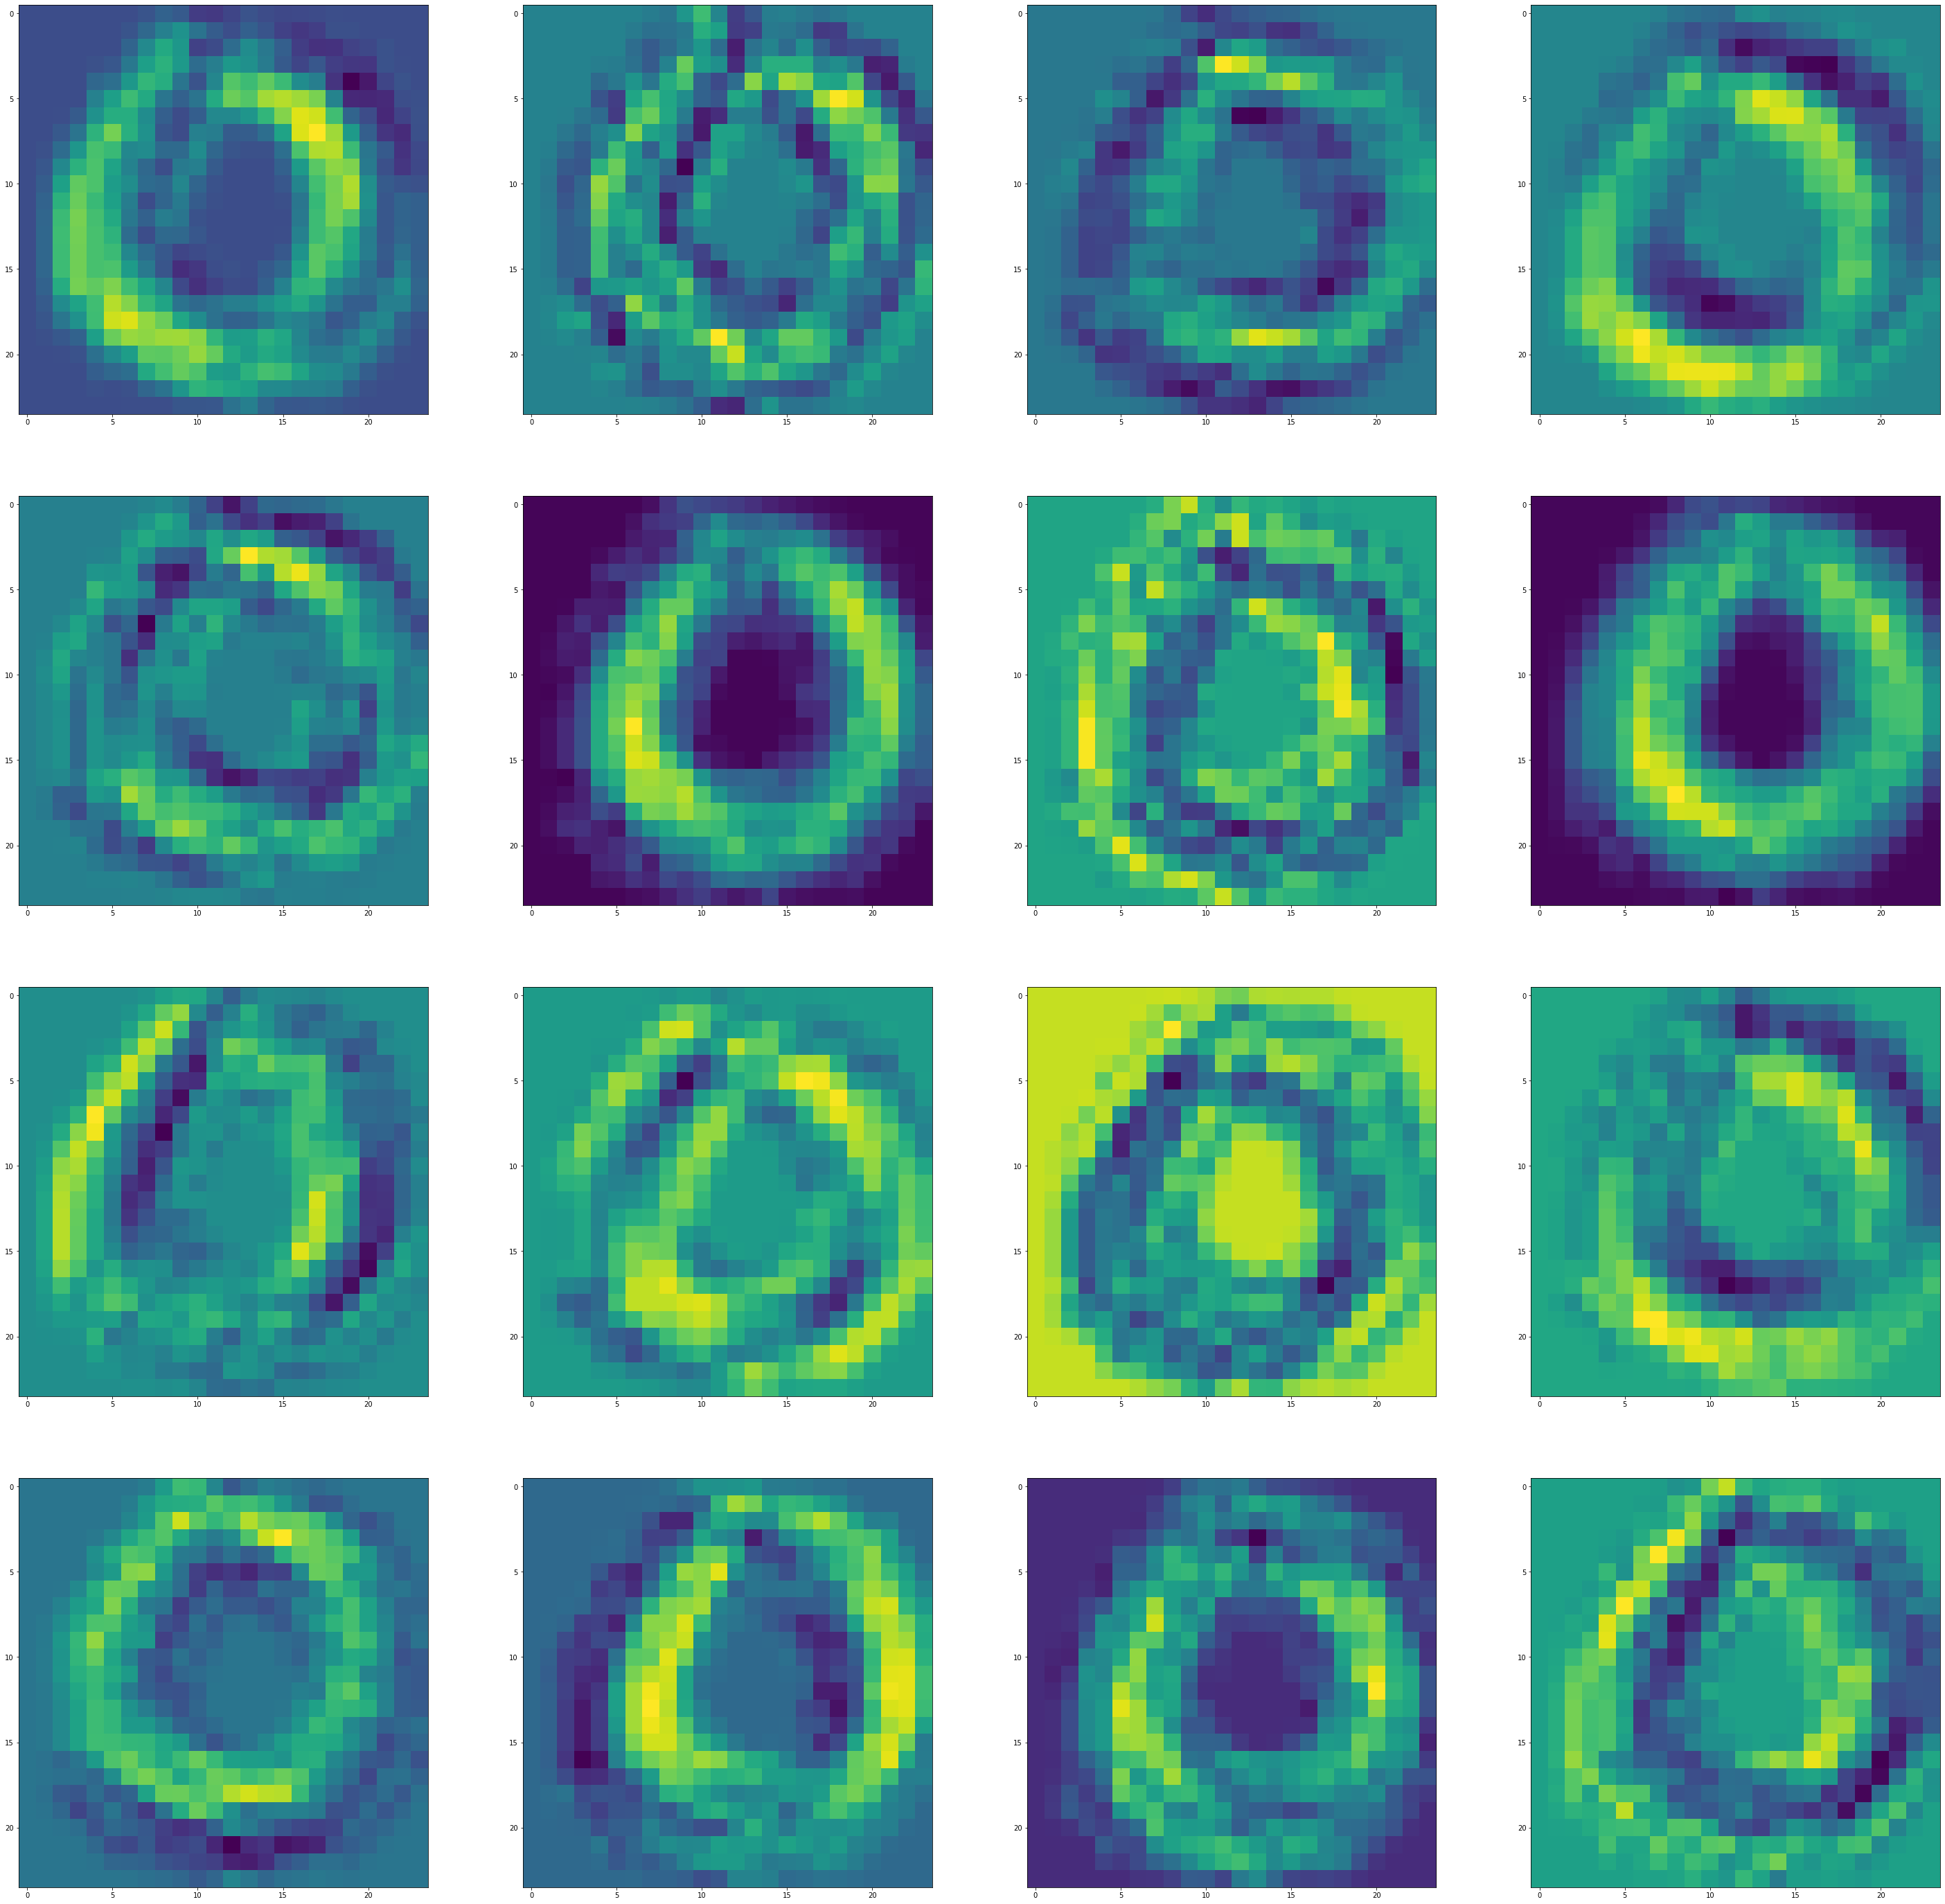

In [11]:
images = viz['outputimage'][1]
images = images.squeeze()
fig = plt.figure(figsize=(50,50))
for i,img in enumerate(image):
    sub = fig.add_subplot(4,4,i+1)
    sub.imshow(img.detach().numpy())
    

## After 1st Maxpool2d Layer

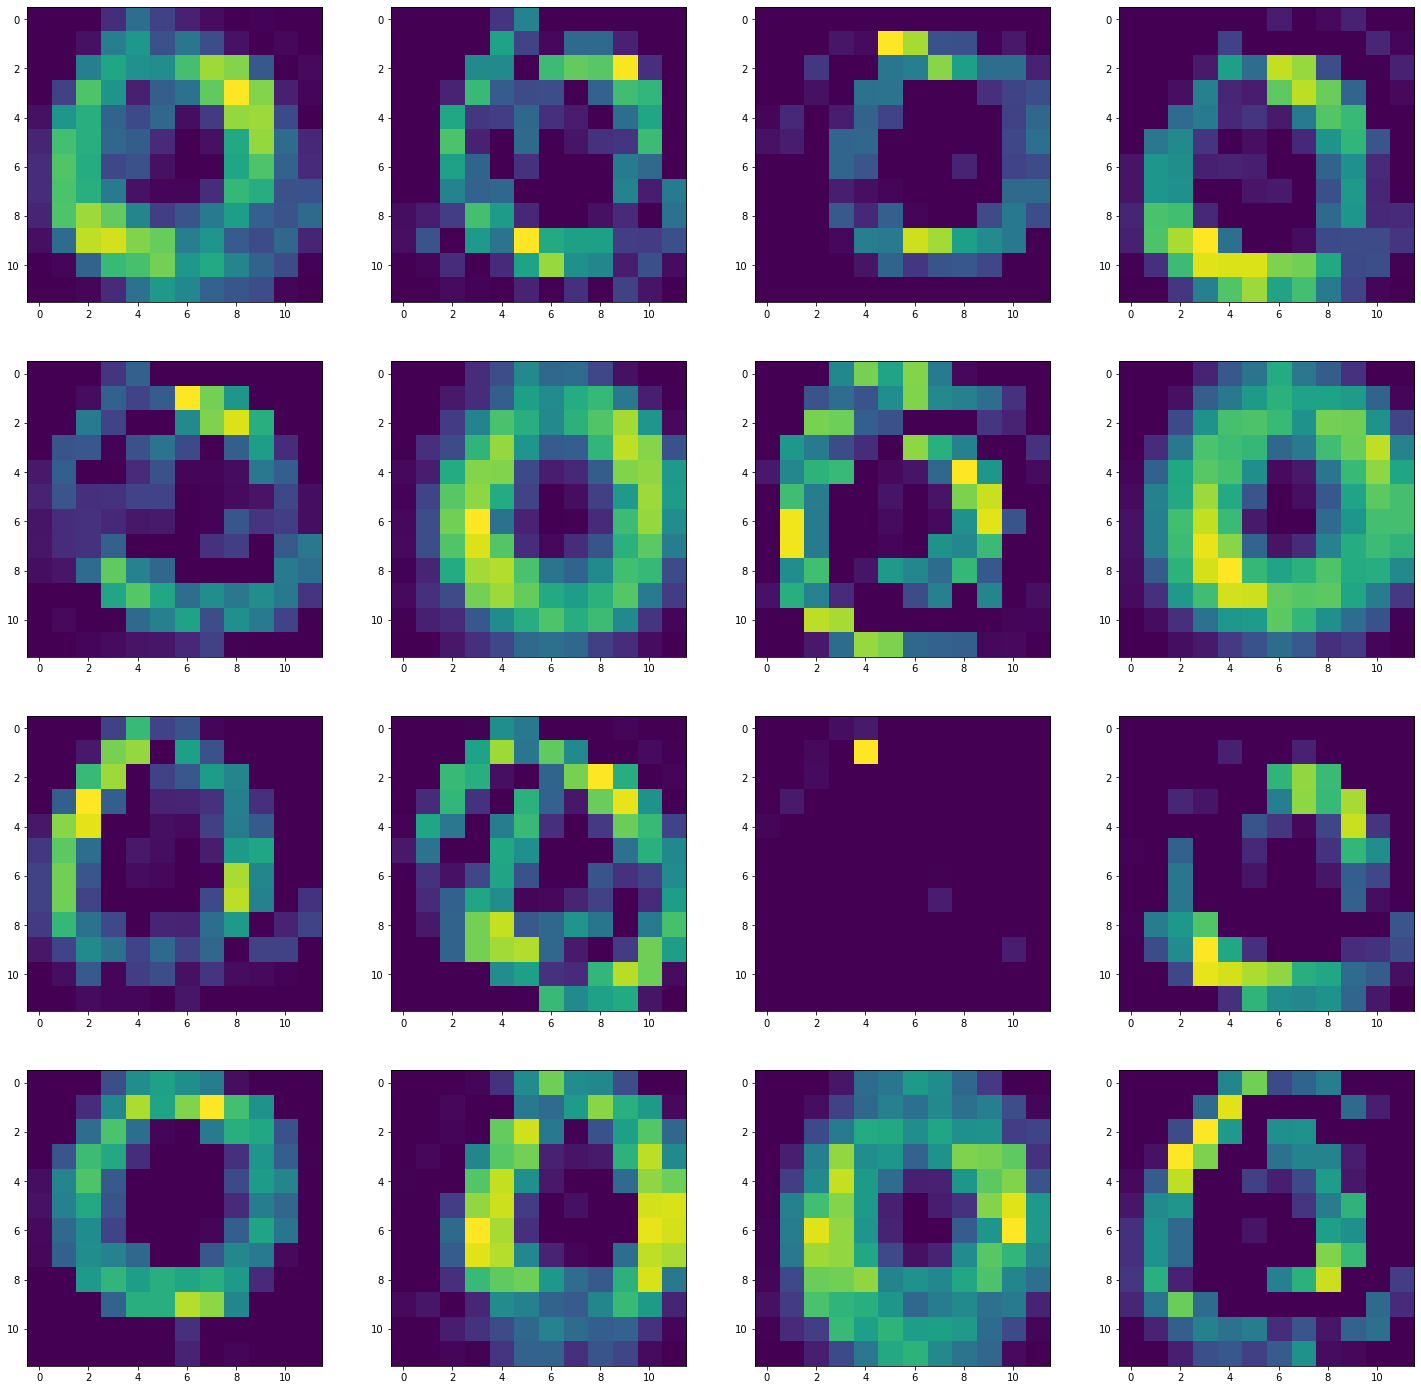

In [12]:
maxpoolimgs = viz['outputimage'][2]
maxpomaxpoolimgs =maxpoolimgs.squeeze()
fig = plt.figure(figsize=(25,25))
for i,img in enumerate(maxpomaxpoolimgs):
    sub = fig.add_subplot(4,4,i+1)
    sub.imshow(img.detach().numpy())
    

## after 2nd conv layer

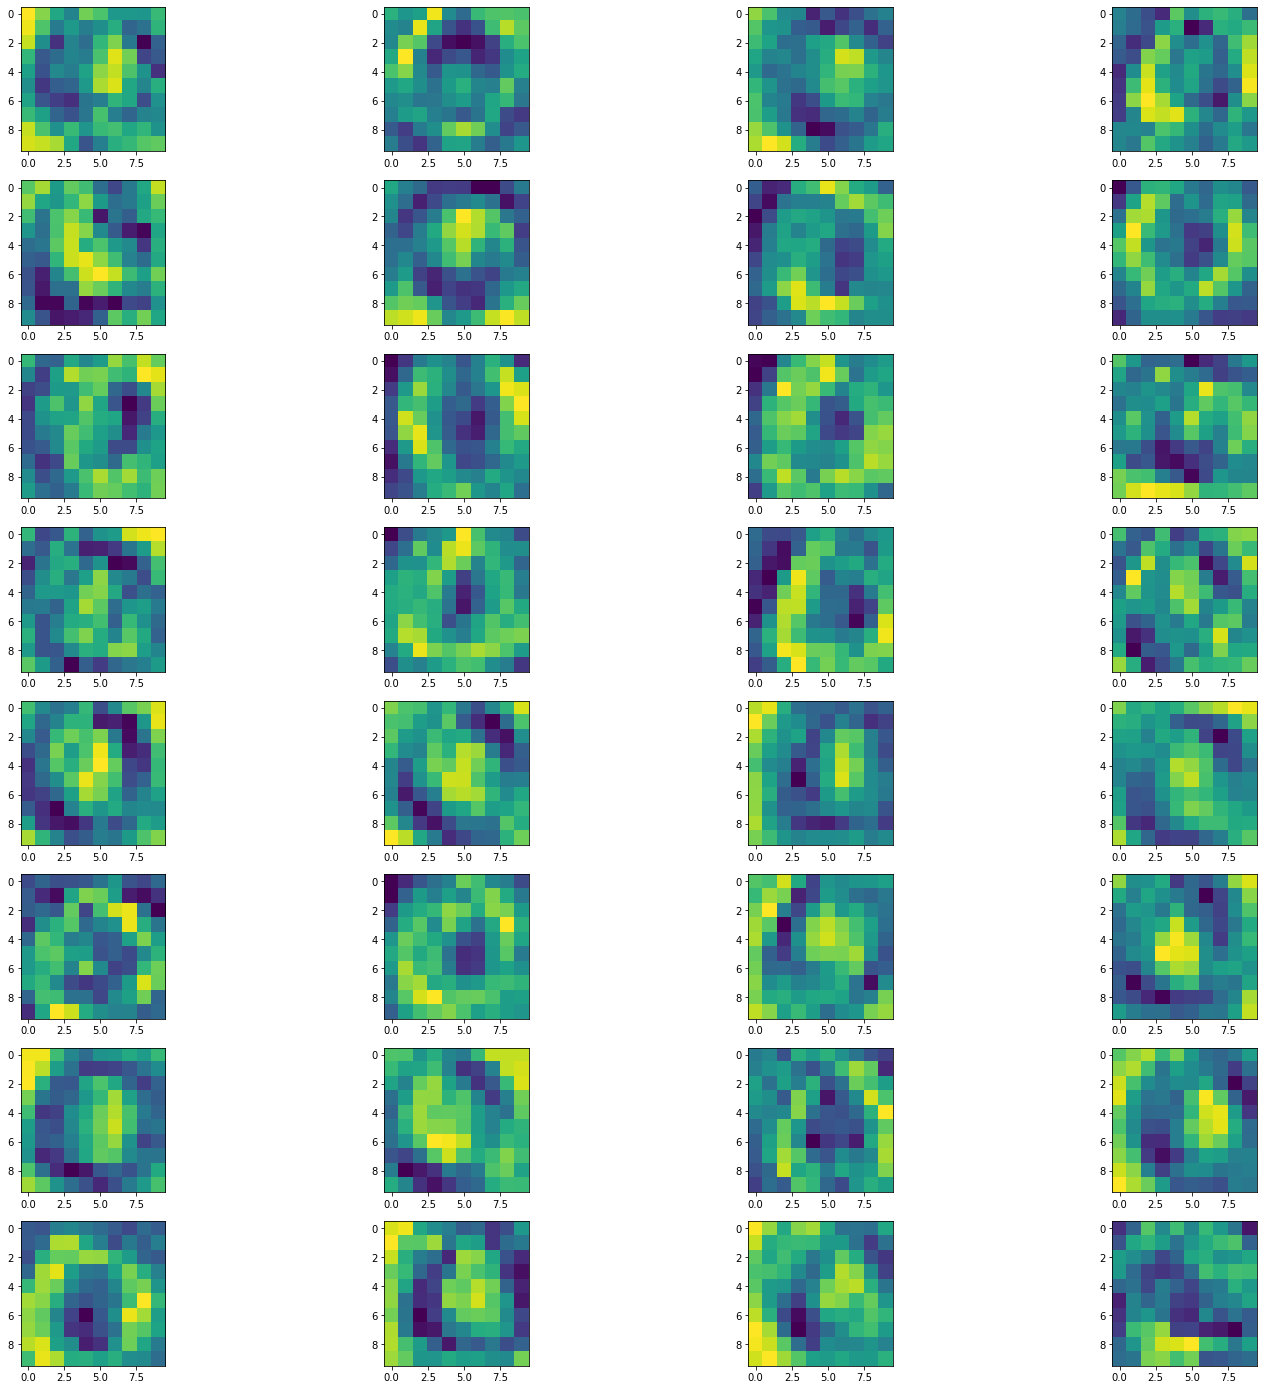

In [13]:
conv2 = viz['outputimage'][3]
conv2 = conv2.squeeze()
fig = plt.figure(figsize=(25,25))
for i,img in enumerate(conv2):
    sub = fig.add_subplot(8,4,i+1)
    sub.imshow(img.detach().numpy())
    

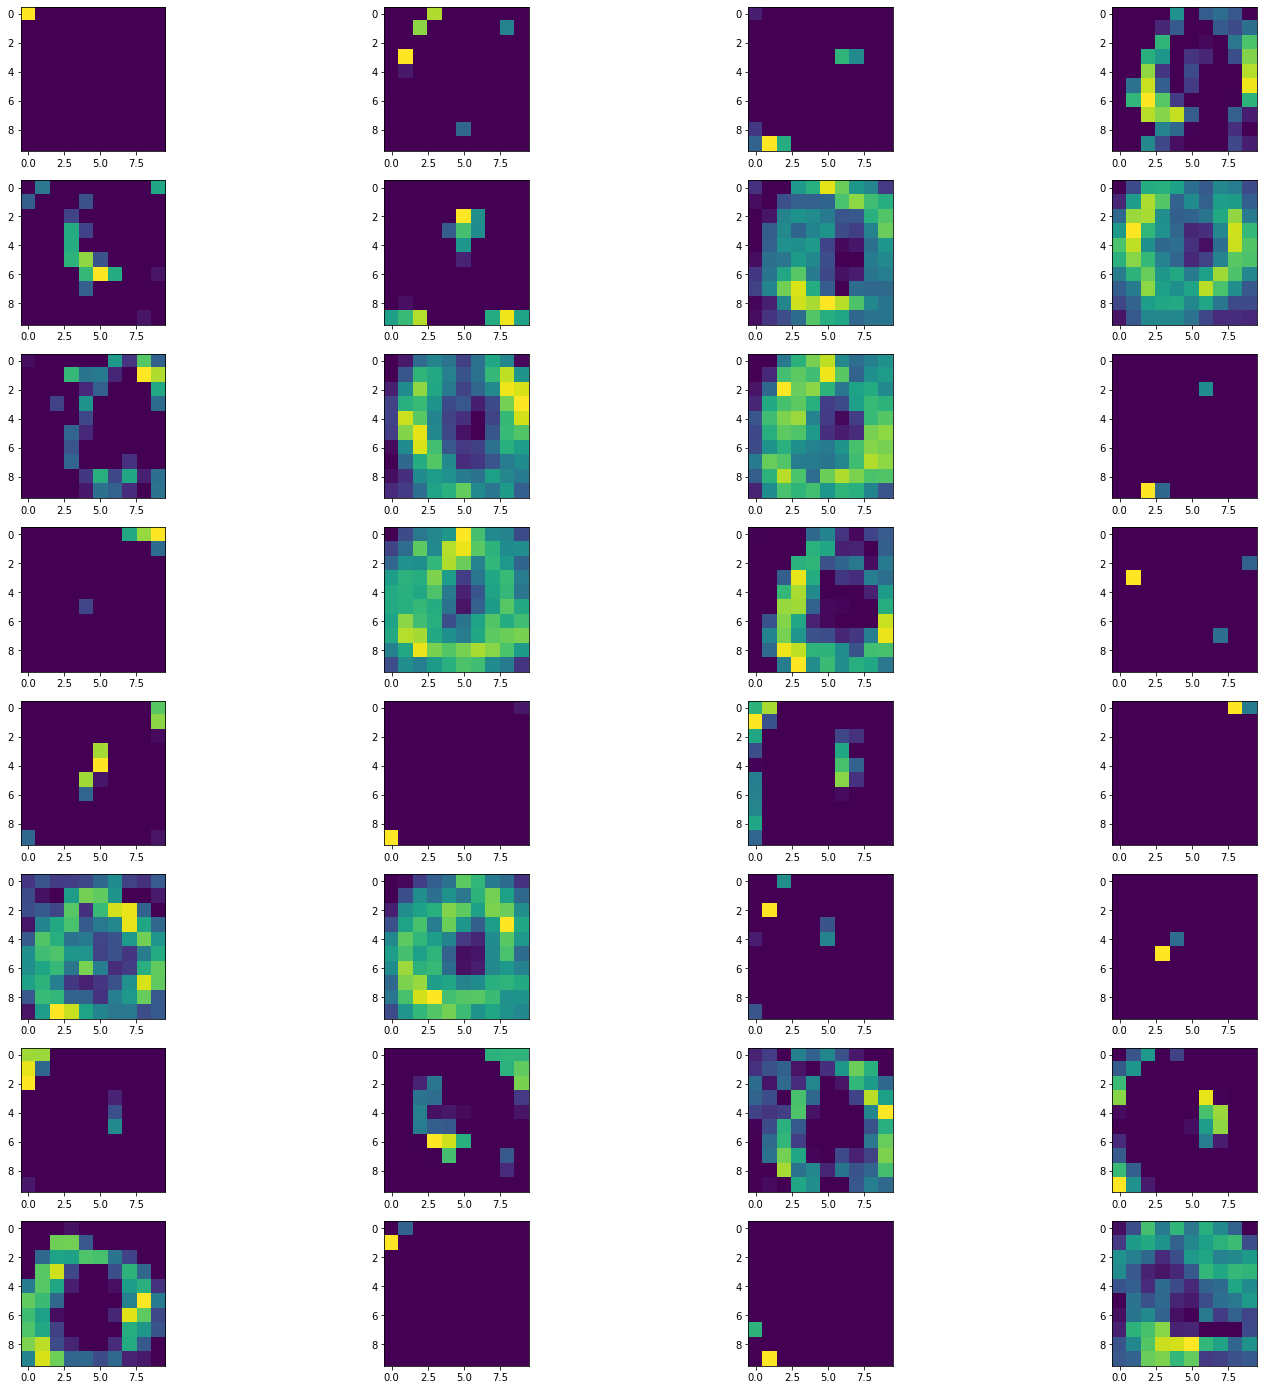

In [14]:
relu1 = viz['outputimage'][4]
relu1 = relu1.squeeze()
fig = plt.figure(figsize=(25,25))
for i,img in enumerate(relu1):
    sub = fig.add_subplot(8,4,i+1)
    sub.imshow(img.detach().numpy())
    

## after 2nd maxpool 

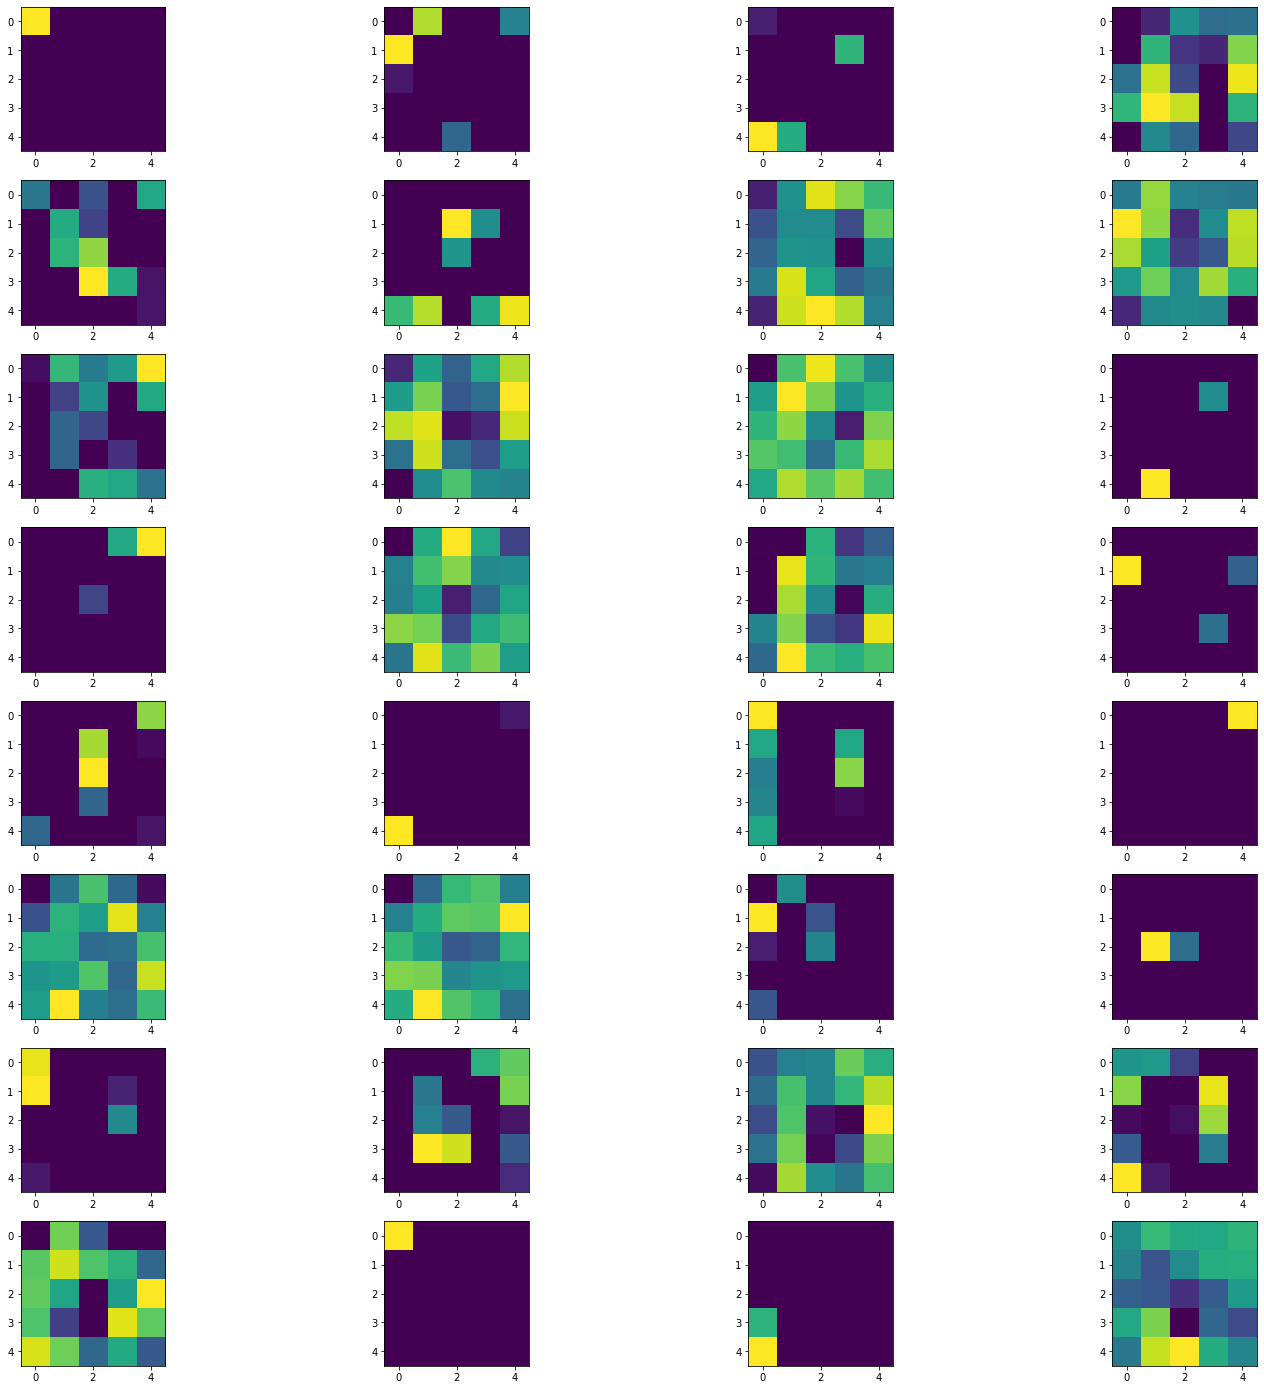

In [15]:
maxpo2d = viz['outputimage'][5]
maxpo2d = maxpo2d.squeeze()
fig = plt.figure(figsize=(25,25))
for i,img in enumerate(maxpo2d):
    sub = fig.add_subplot(8,4,i+1)
    sub.imshow(img.detach().numpy())
    

## after 2nd relu

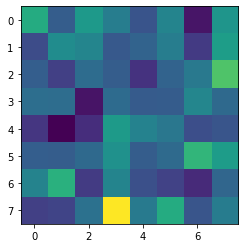

In [22]:
relu2 = viz['outputimage'][6]
relu2 = relu2.squeeze()
relu2 = relu2.reshape((8,8))
plt.imshow(relu2.detach().numpy())

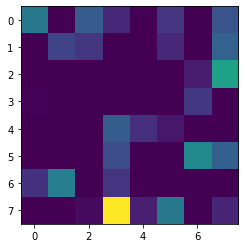

In [25]:
last2dlayer = viz['outputimage'][7]
last2dlayer = last2dlayer.squeeze()
last2dlayer = last2dlayer.reshape((8,8))
plt.imshow(last2dlayer.detach().numpy())

## visualizing the last layer

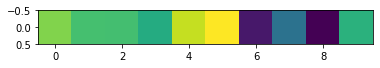

In [28]:
last = viz['outputimage'][8]
last = last.squeeze()
last = last.reshape((1,10))
plt.imshow(last.detach().numpy())

 # kernals

In [39]:
for i in viz['kernels']:
    print(i.shape)

torch.Size([16, 1, 5, 5])
torch.Size([32, 16, 3, 3])
torch.Size([64, 32, 5, 5])
torch.Size([10, 64, 1, 1])


In [50]:
a = viz['kernels'][1]
a=a.view(-1,3,3)
a.shape

torch.Size([512, 3, 3])

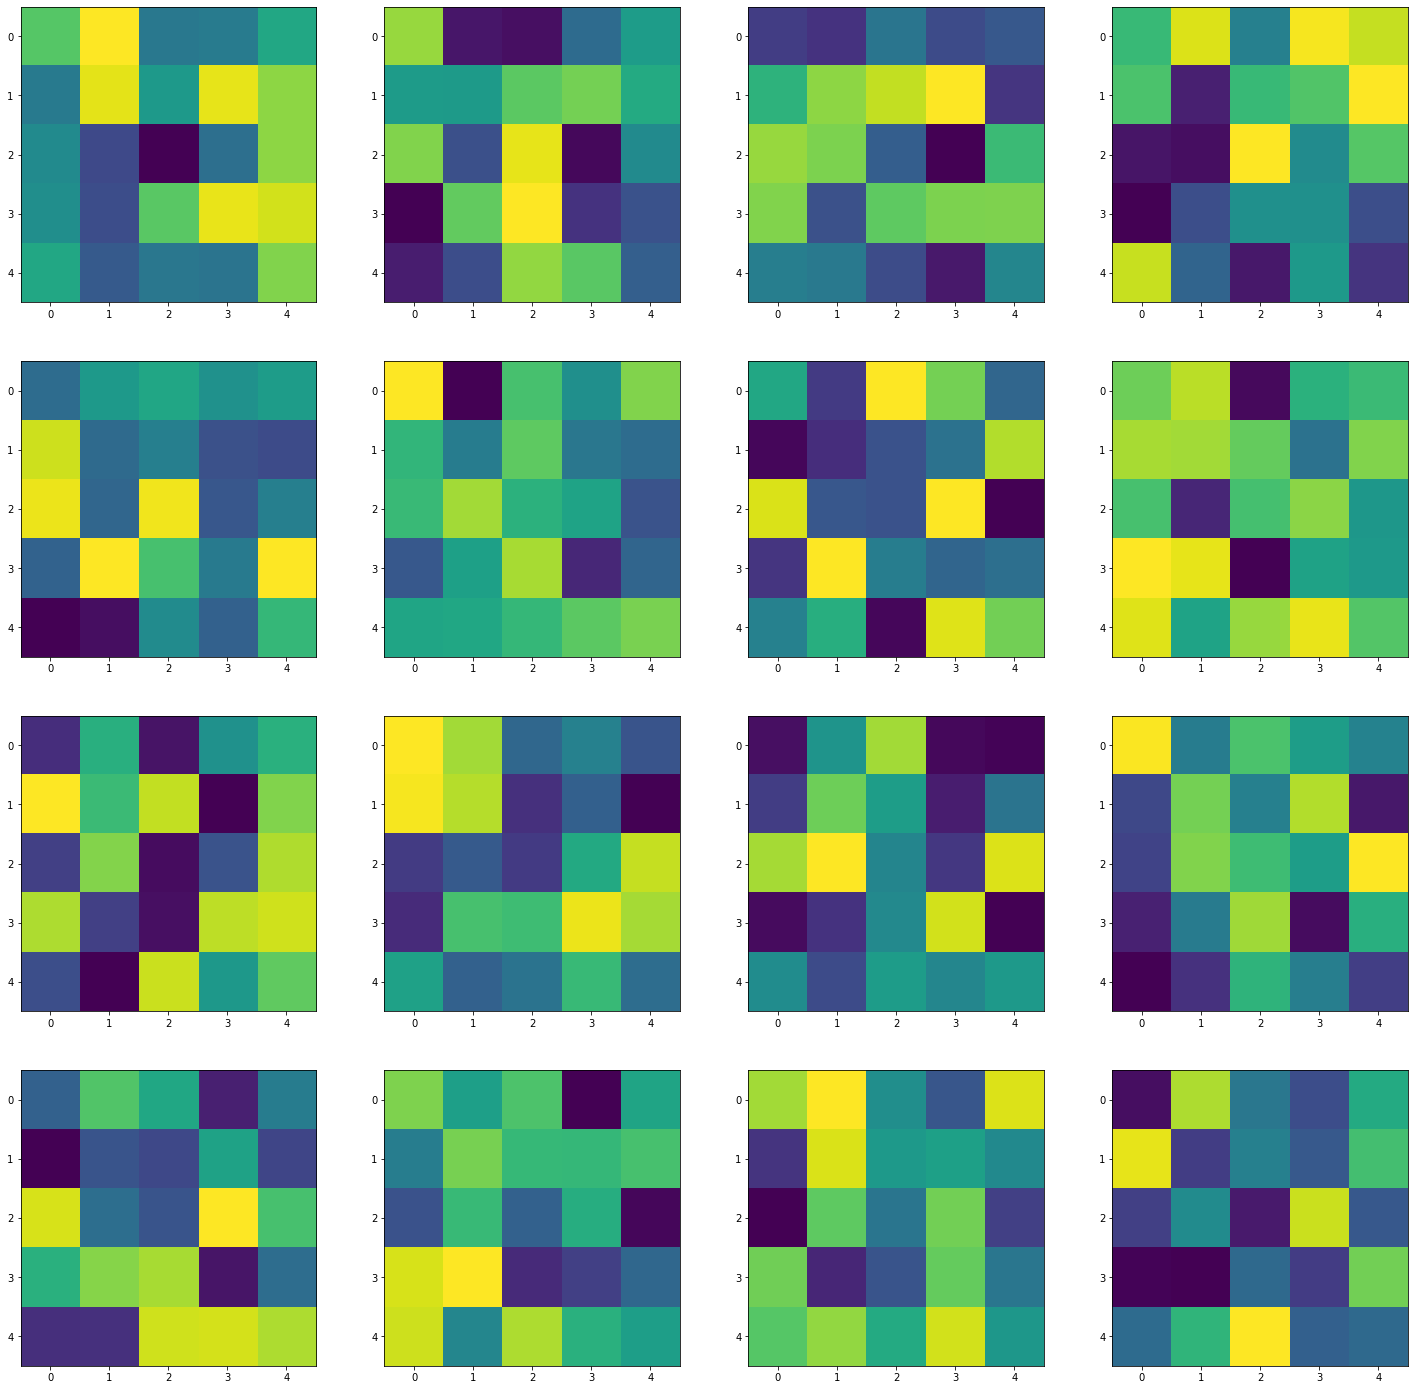

In [47]:
fig = plt.figure(figsize=(25,25))
for j,i in enumerate(viz['kernels'][0]):
    sub = fig.add_subplot(4,4,j+1)
    plt.imshow(i.squeeze().detach().numpy())
    # print(i)

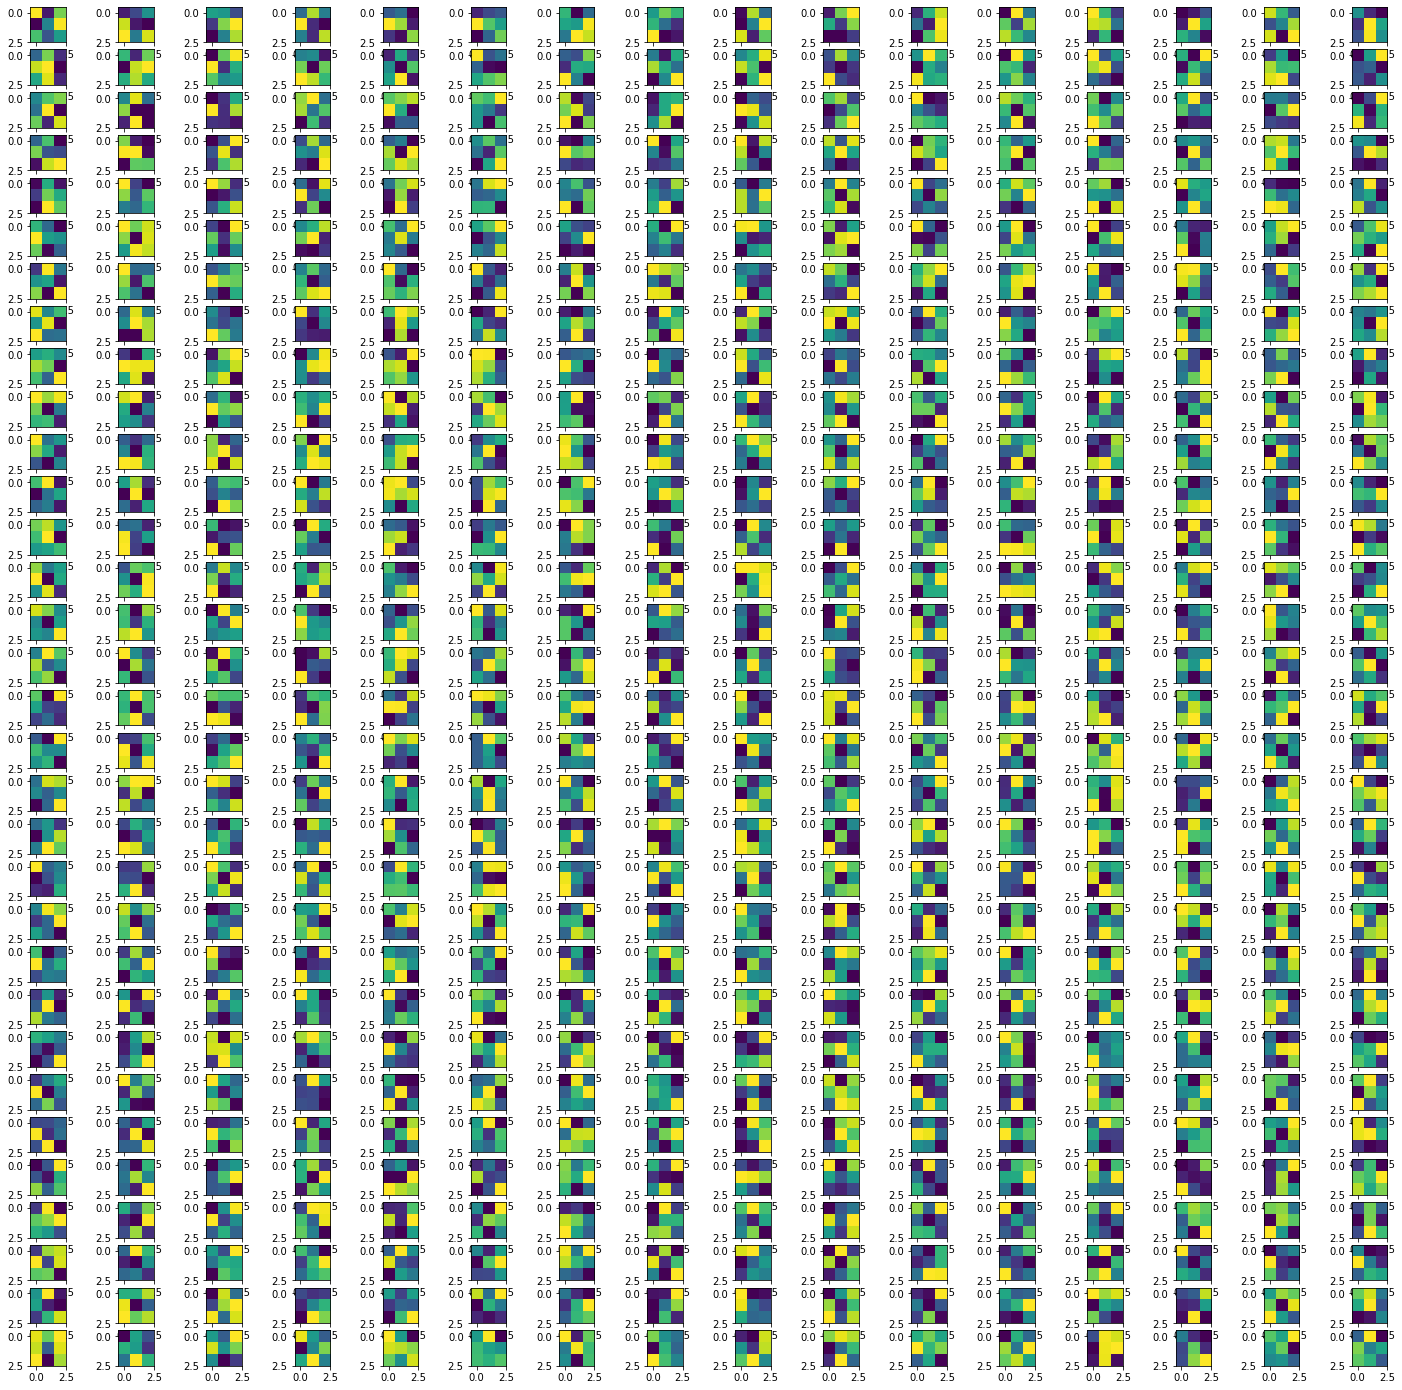

In [53]:
fig = plt.figure(figsize=(25,25))
a = viz['kernels'][1]
a=a.view(-1,3,3)

for j,i in enumerate(a):
    sub = fig.add_subplot(32,16,j+1)
    plt.imshow(i.squeeze().detach().numpy())

In [58]:
fig = plt.figure(figsize=(512,512))
a = viz['kernels'][2]
a=a.view(-1,5,5)

for j,i in enumerate(a):
    sub = fig.add_subplot(64*4,8,j+1)
    plt.imshow(i.squeeze().detach().numpy())